# (Homework) Week 6 - DataScience Bootcamp Fall 2025

**Name:** Yasamin Esmaeili

**Email:** ye2040@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

1. To ensure generalizability, we split the data based on person. So the recordings from around 70% of the speakers (70 people) will be used as train set, 15% (15 people) as validation, and the remaining 15% (15 people) as the test set. Any kind of split on the person level devoting the largest portion of the data to the train set, and the remaining two to the validation and test, could work. The phone dostribution could also be of importance, but since we care about generalizability to new speakers, it is important that the test and validation set uses data from speakers it hasn't seeen in the training set. We could make sure to choose the train set from people with a more even distribution of phones.

2. To add Killian's data and perform well on it, while keeping the generilizibilty on others, we should keep the same split from the previous section, and do a specific split on Killian's data. This split should be done evenly on each phone group. So around 60% of Killian's recordings for each phone group would be selected as train set, 20% as validation set, and 20% as test set. This ensures the model is trained on all the phone groups from Killian's recordings, but still separates them such that the test set won't affect the model training.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt


Step1: Computing Decision Boundary
Grid size: 140 x 160 = 22400 points


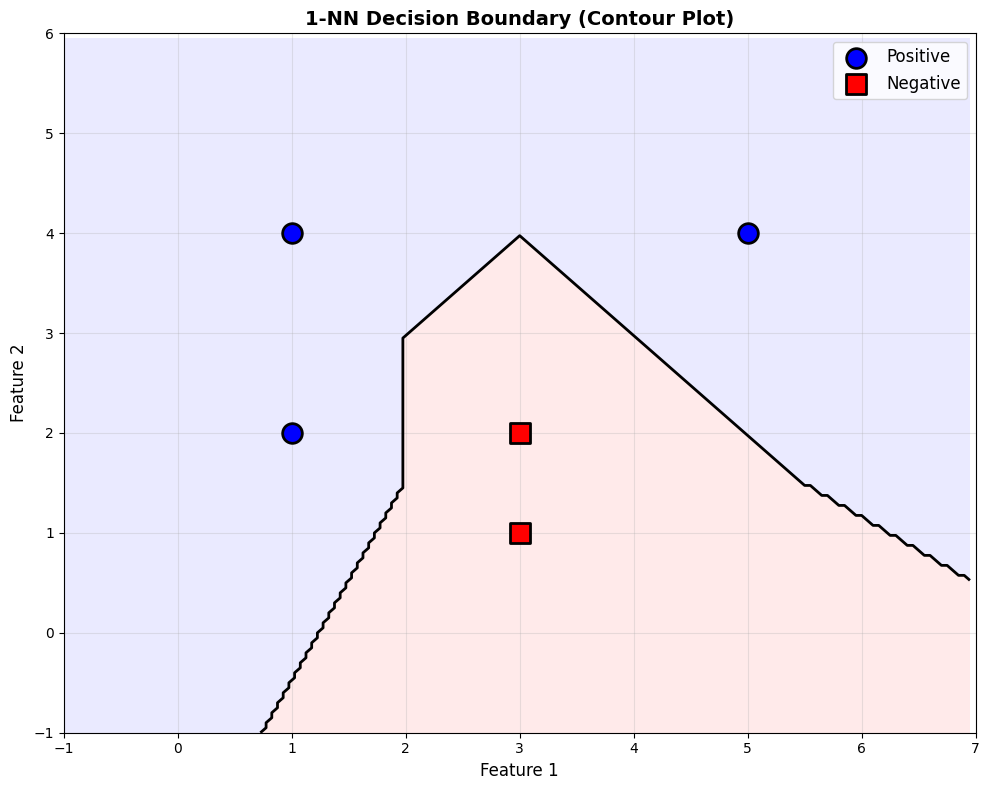

In [ ]:
# Question 1: 1-NN Classification
# 1-NN just uses the single closest point to classify a new point.
# The decision boundary is where you're exactly equidistant from the nearest positive and nearest negative points. 

def plot_1nn_decision_boundary(X,Y):
    """Plot 1-NN decision boundary using meshgrid and contour"""
    
    # Create a mesh grid
    x_min, x_max = -1, 7
    y_min, y_max = -1, 6
    h = 0.05  # Step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Classify each point in the mesh
    print("\nStep1: Computing Decision Boundary")
    print(f"Grid size: {xx.shape[0]} x {xx.shape[1]} = {xx.shape[0] * xx.shape[1]} points")
    
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            # Current point
            point = np.array([xx[i, j], yy[i, j]])
            
            # Calculate distances to all training points
            distances = np.linalg.norm(X - point, axis=1)
            
            # Find nearest neighbor
            nearest_idx = np.argmin(distances)
            Z[i, j] = Y[nearest_idx]
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot decision boundary using contourf (filled contours)
    contour = ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], 
                          colors=['#ffcccc', '#ccccff'], alpha=0.4)
    
    # Plot decision boundary line
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot training points
    ax.scatter(X[Y==1, 0], X[Y==1, 1], c='blue', s=200, 
               marker='o', edgecolors='black', linewidth=2, label='Positive', zorder=3)
    ax.scatter(X[Y==0, 0], X[Y==0, 1], c='red', s=200, 
               marker='s', edgecolors='black', linewidth=2, label='Negative', zorder=3)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title('1-NN Decision Boundary (Contour Plot)', fontsize=14, fontweight='bold')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


positive = np.array([[1, 2], [1, 4], [5, 4]])
negative = np.array([[3, 1], [3, 2]])
    
# Combine all training points
X_train = np.vstack([positive, negative])
y_train = np.array([1, 1, 1, 0, 0])  # 1 for positive, 0 for negative

plot_1nn_decision_boundary(X_train, y_train)

Before Scaling
Distances to all training points: [400.00125    400.01124984   3.         200.         200.00249998]

Nearest point: [500   4] (label: 1, distance: 3.00)
Classification BEFORE scaling: Positive

After Scaling to [0, 1]
Min values per feature: [100   1]
Max values per feature: [500   4]

Scaled training data:
[[0.         0.33333333]
 [0.         1.        ]
 [1.         1.        ]
 [0.5        0.        ]
 [0.5        0.33333333]]
Scaled test point: [1. 0.]

Distances to all training points (scaled): [1.05409255 1.41421356 1.         0.5        0.60092521]

Nearest point: [0.5 0. ] (label: 0, distance: 0.5000)
Classification AFTER scaling: Negative


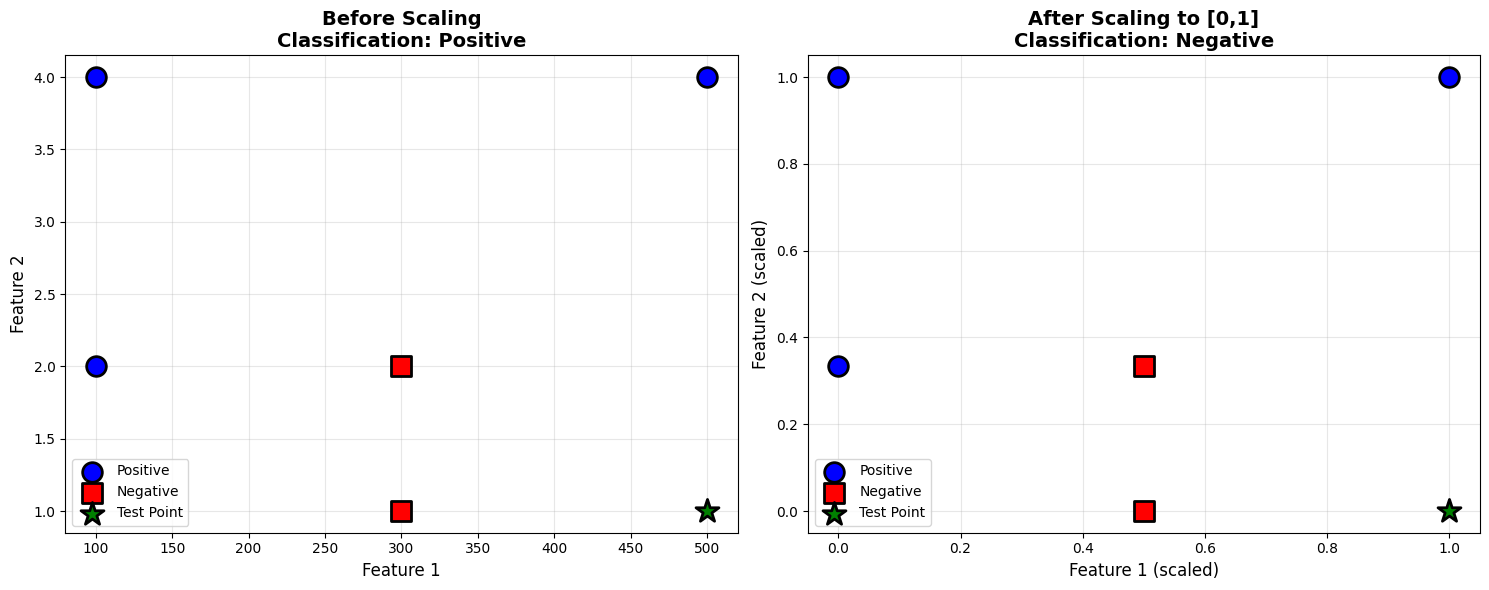

In [5]:
# Question 2: Feature Scaling Impact on 1-NN Classification
# Without scaling, distance calculations are dominated by the feature with larger scale!

def feature_scaling_comparison(X, Y, test_point):
    # Separate positive and negative points for visualization
    positive = X[Y == 1]
    negative = X[Y == 0]
    
    # BEFORE SCALING
    print("Before Scaling")
    distances = np.linalg.norm(X - test_point, axis=1)
    
    print(f"Distances to all training points: {distances}")
    
    nearest_idx = np.argmin(distances)
    min_distance = distances[nearest_idx]
    
    print(f"\nNearest point: {X[nearest_idx]} (label: {Y[nearest_idx]}, distance: {min_distance:.2f})")
    
    classification_before = "Positive" if Y[nearest_idx] == 1 else "Negative"
    print(f"Classification BEFORE scaling: {classification_before}")
    
    # AFTER SCALING to [0, 1]
    print("\nAfter Scaling to [0, 1]")
    
    # Combine all data to find global min/max
    all_data = np.vstack([X, test_point.reshape(1, -1)])
    min_vals = all_data.min(axis=0)
    max_vals = all_data.max(axis=0)
    
    print(f"Min values per feature: {min_vals}")
    print(f"Max values per feature: {max_vals}")
    
    # Scale using min-max scaling: (x - min) / (max - min)
    X_train_scaled = (X - min_vals) / (max_vals - min_vals)
    test_point_scaled = (test_point - min_vals) / (max_vals - min_vals)
    
    # Separate for visualization
    positive_scaled = X_train_scaled[Y == 1]
    negative_scaled = X_train_scaled[Y == 0]
    
    print(f"\nScaled training data:\n{X_train_scaled}")
    print(f"Scaled test point: {test_point_scaled}")
    
    distances_scaled = np.linalg.norm(X_train_scaled - test_point_scaled, axis=1)
    
    print(f"\nDistances to all training points (scaled): {distances_scaled}")
    
    nearest_idx_scaled = np.argmin(distances_scaled)
    min_distance_scaled = distances_scaled[nearest_idx_scaled]
    
    print(f"\nNearest point: {X_train_scaled[nearest_idx_scaled]} (label: {Y[nearest_idx_scaled]}, distance: {min_distance_scaled:.4f})")
    
    classification_after = "Positive" if Y[nearest_idx_scaled] == 1 else "Negative"
    print(f"Classification AFTER scaling: {classification_after}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Before scaling
    ax1.scatter(positive[:, 0], positive[:, 1], c='blue', s=200, marker='o', 
                edgecolors='black', linewidth=2, label='Positive', zorder=3)
    ax1.scatter(negative[:, 0], negative[:, 1], c='red', s=200, marker='s', 
                edgecolors='black', linewidth=2, label='Negative', zorder=3)
    ax1.scatter(test_point[0], test_point[1], c='green', s=300, marker='*', 
                edgecolors='black', linewidth=2, label='Test Point', zorder=4)
    ax1.set_xlabel('Feature 1', fontsize=12)
    ax1.set_ylabel('Feature 2', fontsize=12)
    ax1.set_title(f'Before Scaling\nClassification: {classification_before}', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # After scaling
    ax2.scatter(positive_scaled[:, 0], positive_scaled[:, 1], c='blue', s=200, marker='o', 
                edgecolors='black', linewidth=2, label='Positive', zorder=3)
    ax2.scatter(negative_scaled[:, 0], negative_scaled[:, 1], c='red', s=200, marker='s', 
                edgecolors='black', linewidth=2, label='Negative', zorder=3)
    ax2.scatter(test_point_scaled[0], test_point_scaled[1], c='green', s=300, marker='*', 
                edgecolors='black', linewidth=2, label='Test Point', zorder=4)
    ax2.set_xlabel('Feature 1 (scaled)', fontsize=12)
    ax2.set_ylabel('Feature 2 (scaled)', fontsize=12)
    ax2.set_title(f'After Scaling to [0,1]\nClassification: {classification_after}', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


positive = np.array([[100, 2], [100, 4], [500, 4]])
negative = np.array([[300, 1], [300, 2]])
X_train = np.vstack([positive, negative])
y_train = np.array([1, 1, 1, 0, 0])  # 1 for positive, 0 for negative
test_point = np.array([500, 1])

feature_scaling_comparison(X_train, y_train, test_point)

After the scaling, the range of the distance changed, and the label changed from positive to negative.

In [ ]:
# Question 3; Handling missing values
# Alternatives are skipping the features that has missing values, or imputing them with mean/median/mode. 
# More complex methods include weighting different features differently, like lower weight for features with more missing values.
# Here we only implement the first two simple methods.

def knn_with_missing_values(X, Y, x_test, k=1, method='skip'):
    #Methods:
    #- 'skip': Only use non-missing dimensions for distance calculation
    #- 'mean': Impute missing values with feature mean from training data
    print(f"\nK-NN with Missing Values (method='{method}')")
    
    if method == 'mean':
        # Impute missing values with mean
        x_test_imputed = x_test.copy()
        for i in range(len(x_test)):
            if np.isnan(x_test[i]):
                x_test_imputed[i] = np.nanmean(X[:, i])
        
        print(f"Test point (original): {x_test}")
        print(f"Test point (imputed): {x_test_imputed}")
        
        # Calculate distances normally
        distances = np.linalg.norm(X - x_test_imputed, axis=1)
        
    elif method == 'skip':
        # Only use non-missing dimensions
        valid_dims = ~np.isnan(x_test)
        print(f"Test point: {x_test}")
        print(f"Valid dimensions: {valid_dims}")
        
        # Calculate distances only on valid dimensions
        distances = np.sqrt(np.sum((X[:, valid_dims] - x_test[valid_dims])**2, axis=1))
    
    print(f"Distances: {distances}")
    
    # Find k nearest neighbors
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = Y[nearest_indices]
    
    print(f"Nearest {k} neighbor(s): indices {nearest_indices}, labels {nearest_labels}")
    
    # Majority vote
    prediction = np.bincount(nearest_labels).argmax()
    print(f"Prediction: {prediction}")
    
    return prediction



# Example dataset
X_train = np.array([[1, 2], [1, 4], [5, 4], [3, 1], [3, 2]])
y_train = np.array([1, 1, 1, 0, 0])

# Test point with missing value (NaN in second feature)
x_test = np.array([2, np.nan])

# Try both methods
knn_with_missing_values(X_train, y_train, x_test, k=1, method='skip')
knn_with_missing_values(X_train, y_train, x_test, k=1, method='mean')


K-NN with Missing Values (method='skip')
Test point: [ 2. nan]
Valid dimensions: [ True False]
Distances: [1. 1. 3. 1. 1.]
Nearest 1 neighbor(s): indices [0], labels [1]
Prediction: 1

K-NN with Missing Values (method='mean')
Test point (original): [ 2. nan]
Test point (imputed): [2.  2.6]
Distances: [1.16619038 1.72046505 3.31058907 1.88679623 1.16619038]
Nearest 1 neighbor(s): indices [0], labels [1]
Prediction: 1


np.int64(1)

Question 4: High-dimensional Data: Why can K-NN still work well for images even with thousands of pixels?

The answer lies withing the natural structure of an image. Naturally, images have a spatial structure, where nearby pixels are highly similar/correlated. Not all dimensions in this high dimensional space is noise. Euclidean distance in pixel space often correlates with perceptual similarity.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

**Answer**: 
1. Yes it helps. By computing $h(x) = sign(w \cdot x)$ for every point in both datasets, you can count the misclassifications, where $h(x) \neq y$, for both training set and test set. Once you have both error rates, you can determine which is higher.

2. Assuming the data is linearly separable, the Perceptron algorithm only stops when it makes no mistakes on the training set, and guarantees zero training error. Also, the Perceptron updates its weights only when there's a misclassified point. If there are no misclassifications, there are no updates, and the algorithm terminates. This assumes the data is linearly separable. If not, the Perceptron may never converge, or you might stop it after a maximum number of iterations, while the error is non-zero.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [15]:
def perceptron(X, y, learning_rate=1, max_iterations=100):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    
    # Store sequence of weight vectors
    w_sequence = [w.copy()]
    num_updates = 0
    iteration = 0
    
    print(f"Initial weight: w_0 = {w}")
    
    converged = False
    while not converged and iteration < max_iterations:
        iteration += 1
        errors = 0
        
        print(f"\nIteration {iteration}:")
        
        # Go through each training example
        for i in range(n_samples):
            x_i = X[i]
            y_i = y[i]
            
            # Compute prediction: sign(w · x)
            prediction = np.sign(np.dot(w, x_i))
            
            # Handle the case where prediction is 0 (treat as -1)
            if prediction == 0:
                prediction = -1
            
            # Check if misclassified
            if prediction != y_i:
                errors += 1
                num_updates += 1
                
                # Update rule: w = w + learning_rate * y_i * x_i
                w_old = w.copy()
                w = w + learning_rate * y_i * x_i
                w_sequence.append(w.copy())
                print(f"Updated weight: w = {w}")
        
        # Check for convergence (no errors in this pass)
        if errors == 0:
            converged = True
    
    if not converged:
        print(f"\nWarning: Did not converge after {max_iterations} iterations")
    
    return w_sequence, num_updates

# Define the dataset
# Positive class: (10, -2), label = +1
# Negative class: (12, 2), label = -1
X = np.array([
    [10, -2],  # Positive example
    [12, 2]    # Negative example
])

y = np.array([1, -1])  # +1 for positive class, -1 for negative class

# Run the Perceptron algorithm
w_sequence, num_updates = perceptron(X, y, learning_rate=1)

# Results
print(f"Number of updates required: {num_updates}")

Initial weight: w_0 = [0. 0.]

Iteration 1:
Updated weight: w = [10. -2.]
Updated weight: w = [-2. -4.]

Iteration 2:
Updated weight: w = [ 8. -6.]
Updated weight: w = [-4. -8.]

Iteration 3:
Updated weight: w = [  6. -10.]
Updated weight: w = [ -6. -12.]

Iteration 4:
Updated weight: w = [  4. -14.]
Updated weight: w = [ -8. -16.]

Iteration 5:
Updated weight: w = [  2. -18.]

Iteration 6:
Number of updates required: 9


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [17]:
# Question 4: Reconstructing the Weight Vector from Update Log
# Each update in the Perceptron follows: w_new = w_old + learning_rate * y * x
# Since we start with w_0 = 0, the final weight is just the sum of all updates.

def reconstruct_weight_vector(updates_log, learning_rate=1):
    print(f"Initial weight: w_0 = {np.zeros(len(updates_log[0][0]))}")
    print(f"Learning rate: {learning_rate}")
    
    n_features = len(updates_log[0][0])
    w = np.zeros(n_features)
    
    total_updates = 0
    
    for i, (x, y, count) in enumerate(updates_log, 1):
        x = np.array(x)
        
        # Calculate the contribution of this update
        update_vector = learning_rate * y * x
        total_contribution = count * update_vector
        
        print(f"  Update once: {learning_rate} * {y:+d} * {x} = {update_vector}")
        print(f"  Applied {count} time(s).")
        
        # Apply the update 'count' times
        w = w + total_contribution
        
        total_updates += count
        
        print(f"Updated w = {w}")
        print()
    
    print(f"Final weight vector: w_final = {w}")
    
    return w

# Define the update log from the problem
# Format: (x, y, count)
updates_log = [
    ([0, 0, 0, 0, 4], +1, 2),   # Updated 2 times
    ([0, 0, 6, 5, 0], +1, 1),   # Updated 1 time
    ([3, 0, 0, 0, 0], -1, 1),   # Updated 1 time
    ([0, 9, 3, 6, 0], -1, 1),   # Updated 1 time
    ([0, 1, 0, 2, 5], -1, 1),   # Updated 1 time
]

# Reconstruct the weight vector
w_final = reconstruct_weight_vector(updates_log, learning_rate=1)

Initial weight: w_0 = [0. 0. 0. 0. 0.]
Learning rate: 1
  Update once: 1 * +1 * [0 0 0 0 4] = [0 0 0 0 4]
  Applied 2 time(s).
Updated w = [0. 0. 0. 0. 8.]

  Update once: 1 * +1 * [0 0 6 5 0] = [0 0 6 5 0]
  Applied 1 time(s).
Updated w = [0. 0. 6. 5. 8.]

  Update once: 1 * -1 * [3 0 0 0 0] = [-3  0  0  0  0]
  Applied 1 time(s).
Updated w = [-3.  0.  6.  5.  8.]

  Update once: 1 * -1 * [0 9 3 6 0] = [ 0 -9 -3 -6  0]
  Applied 1 time(s).
Updated w = [-3. -9.  3. -1.  8.]

  Update once: 1 * -1 * [0 1 0 2 5] = [ 0 -1  0 -2 -5]
  Applied 1 time(s).
Updated w = [ -3. -10.   3.  -3.   3.]

Final weight vector: w_final = [ -3. -10.   3.  -3.   3.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

In [2]:
# Question 5: Visualizing Perceptron Convergence
# Similar to perceptron implementaton in the class notes
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        self.weights = None
        self.bias = None
        self.history = []  # Store weight history for visualization
        
    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)
        
    def fit(self, X, y, epochs=100):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Store initial state
        self.history.append((self.weights.copy(), self.bias))
        
        # Training loop
        for epoch in range(epochs):
            updates_made = False
            for idx, x_i in enumerate(X):
                # Prediction
                y_pred = self.predict(x_i)
                
                # Update rule (only if misclassified)
                if y[idx] * y_pred <= 0:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]
                    self.history.append((self.weights.copy(), self.bias))
                    updates_made = True
            
            # If no updates were made, we've converged
            if not updates_made:
                print(f"Converged after {epoch + 1} epochs!")
                break
        
        return self

In [20]:
# Generate a linearly separable 2D dataset
np.random.seed(42)

# Positive examples (class +1)
X_pos = 1.5*np.random.randn(40, 2) + np.array([2 , 2])
y_pos = np.ones(40)

# Negative examples (class -1)
X_neg = 1.5*np.random.randn(40, 2) + np.array([-2, -2])
y_neg = -np.ones(40)

# Combine the data
X = np.vstack([X_pos, X_neg])
y = np.hstack([y_pos, y_neg])

# Shuffle the data
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

# Train the perceptron
perceptron = Perceptron(learning_rate=0.1)
perceptron.fit(X, y, epochs=100)

print(f"Total updates: {len(perceptron.history)}")
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias}")

Converged after 3 epochs!
Total updates: 8
Final weights: [0.29698458 0.31956262]
Final bias: -0.1


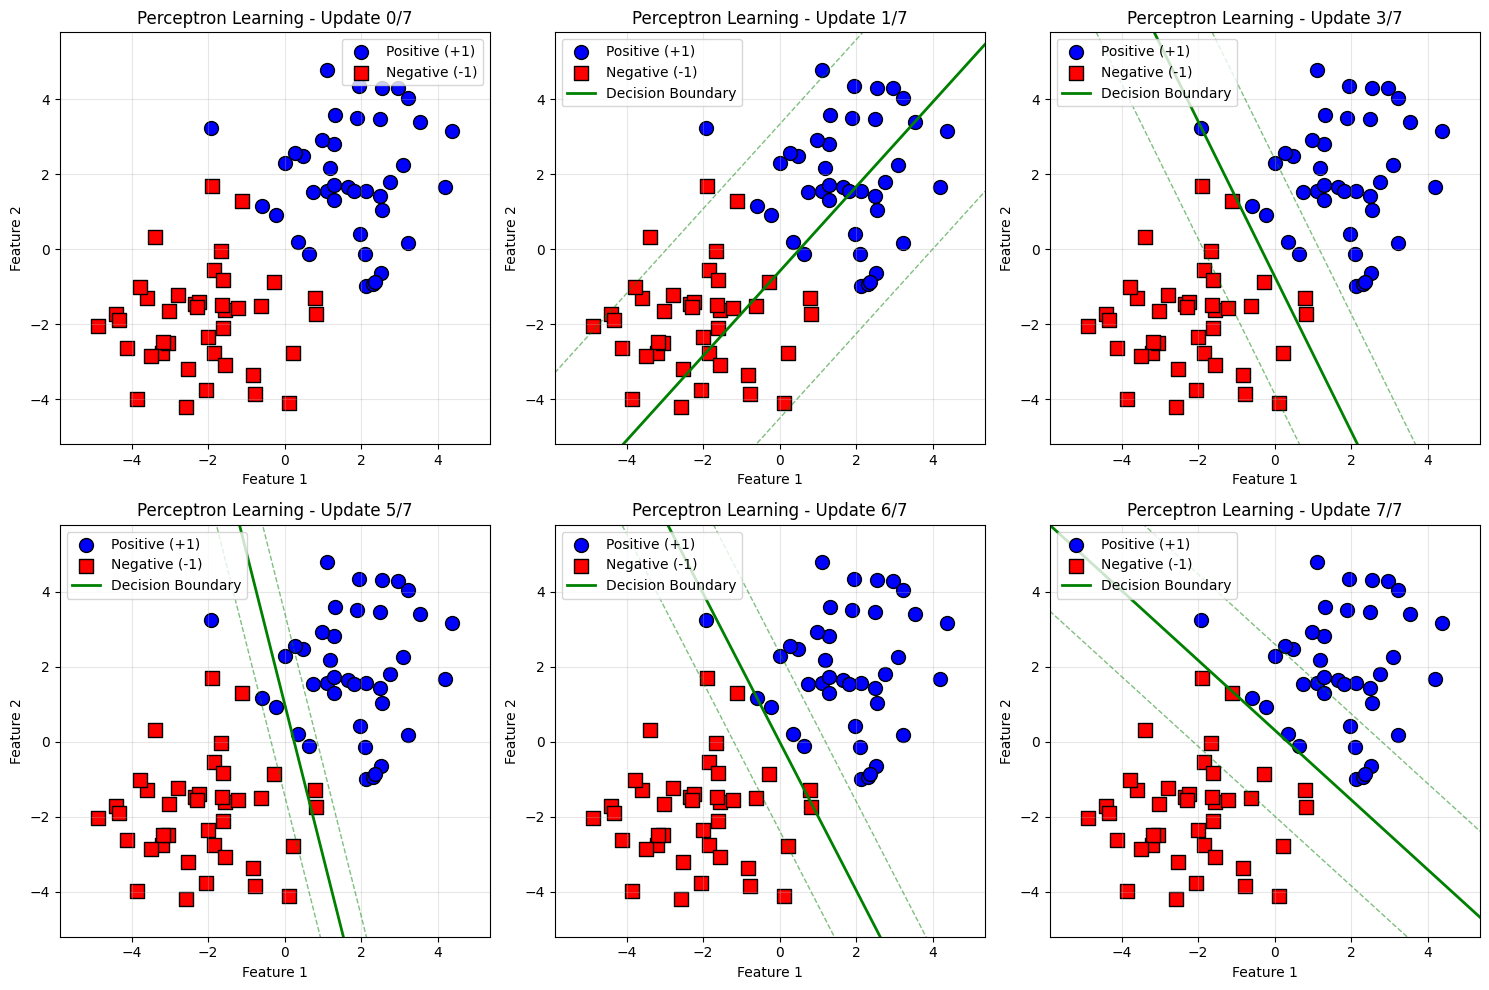


Visualization shows 6 key stages of the learning process:
- Initial random boundary
- Early updates as it learns
- Final converged state


In [ ]:
# Visualization function
def plot_decision_boundary(ax, weights, bias, X, y, step):
    ax.clear()
    
    # Plot data points
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
               c='blue', marker='o', s=100, label='Positive (+1)', edgecolors='k')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], 
               c='red', marker='s', s=100, label='Negative (-1)', edgecolors='k')
    
    # Plot decision boundary
    # The decision boundary is: w1*x1 + w2*x2 + b = 0
    # Solving for x2: x2 = -(w1*x1 + b) / w2
    
    if weights[1] != 0:  # Avoid division by zero
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x_vals = np.array([x_min, x_max])
        y_vals = -(weights[0] * x_vals + bias) / weights[1]
        
        ax.plot(x_vals, y_vals, 'g-', linewidth=2, label='Decision Boundary')
        
        # Plot the margin lines (optional, for visualization)
        margin = 1 / np.linalg.norm(weights)
        y_vals_pos = y_vals + margin
        y_vals_neg = y_vals - margin
        ax.plot(x_vals, y_vals_pos, 'g--', linewidth=1, alpha=0.5)
        ax.plot(x_vals, y_vals_neg, 'g--', linewidth=1, alpha=0.5)
    
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Perceptron Learning - Update {step}/{len(perceptron.history)-1}')
    ax.legend()
    ax.grid(True, alpha=0.3)


# Create static plots showing key stages
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Show initial state and several intermediate states
plot_indices = [0, 1, 3, 5, 6, len(perceptron.history)-1]
plot_indices = [min(i, len(perceptron.history)-1) for i in plot_indices]


for i, idx in enumerate(plot_indices):
    weights, bias = perceptron.history[idx]
    plot_decision_boundary(axes[i], weights, bias, X, y, idx)

plt.tight_layout()
plt.show()

print("\nVisualization shows stages of the learning process:")
print("- Initial random boundary")
print("- Early updates as it learns")
print("- Final converged state")